# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\Kalyan\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\Kalyan\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

My classroom consists of twenty-two amazing sixth graders from different cultures and backgrounds. They are a social bunch who enjoy working in partners and working with groups. They are hard-working and eager to head to middle school next year. My job is to get them ready to make this transition and make it as smooth as possible. In order to do this, my students need to come to school every day and feel safe and ready to learn. Because they are getting ready to head to middle school, I give them lots of choice- choice on where to sit and work, the order to complete assignments, choice of projects, etc. Part of the students feeling safe is the ability for them to come into a welcoming, encouraging environment. My room is colorful and the atmosphere is casual. I want them to take ownership of the classroom because we ALL share it together. Because my time with them is limited, I want to ensure they get the most of this time and enjoy it to the best of their abilities.Currently, we have 

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [16]:
# https://gist.github.com/sebleier/554280
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
from tqdm import tqdm
preprocessed_essays = []
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████| 109248/109248 [02:15<00:00, 805.50it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
print(project_data['project_title'].values[0])

Engineering STEAM into the Primary Classroom


In [20]:
sent = decontracted(project_data['project_title'].values[20000])
print(sent)
print("="*50)

Health Nutritional Cooking in Kindergarten


In [21]:
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Health Nutritional Cooking in Kindergarten


In [22]:
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Health Nutritional Cooking in Kindergarten


In [23]:
from tqdm import tqdm
preprocessed_titles = []
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████| 109248/109248 [00:06<00:00, 17676.21it/s]


In [24]:
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

## 1.5 Preparing data for models

In [25]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.3 Vectorizing Numerical features

In [26]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [27]:
catogories_grade = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list_grade = []
for i in catogories_grade:
    temp = ""
    for j in i:
        j = j.replace('-','_') 
        j = j.replace(' ','_')
        temp+=j.strip('')
        temp = temp.replace('&','_') 
    cat_list_grade.append(temp.strip())
print(cat_list_grade[0:5])       
project_data['clean_grades'] = cat_list_grade
project_data.drop(['project_grade_category'], axis=1, inplace=True)

['Grades_PreK_2', 'Grades_3_5', 'Grades_PreK_2', 'Grades_PreK_2', 'Grades_3_5']


In [28]:
project_data['teacher_prefix'].fillna('NoValue',inplace=True)

In [29]:
project_data.head(2)
project_data.shape

(109248, 20)

In [30]:
project_data["preprocessed_essays"]=preprocessed_essays
project_data["preprocessed_titles"]=preprocessed_titles


In [31]:
project_data.head(2)
project_data.shape

(109248, 22)

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [32]:
cols = list(project_data.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('project_is_approved')) #Remove project_is_approved from list
project_data_KNN = project_data[cols+['project_is_approved']]
project_data_KNN.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_title,project_essay_1,project_essay_2,project_essay_3,...,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,quantity,clean_grades,preprocessed_essays,preprocessed_titles,project_is_approved
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,...,53,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,725.05,4,Grades_PreK_2,fortunate enough use fairy tale stem kits clas...,engineering steam primary classroom,1
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,...,4,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...,213.03,8,Grades_3_5,imagine 8 9 years old third grade classroom se...,sensory tools focus,1


In [33]:
project_data_KNN=project_data_KNN[0:50000]
X=np.array(project_data_KNN.iloc[0:50000,0:21])
Y=np.array(project_data_KNN['project_is_approved'])

In [34]:
project_data_KNN.teacher_prefix.unique()

array(['Mrs.', 'Ms.', 'Mr.', 'Teacher', 'NoValue', 'Dr.'], dtype=object)

In [35]:
print(X.shape)
print(Y.shape)

(50000, 21)
(50000,)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33) 
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33) 
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(22445, 21) (22445,)
(11055, 21) (11055,)
(16500, 21) (16500,)


In [37]:
np.unique(X_train[:,3])

array(['Dr.', 'Mr.', 'Mrs.', 'Ms.', 'NoValue', 'Teacher'], dtype=object)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [38]:
project_data_KNN.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity', 'clean_grades',
       'preprocessed_essays', 'preprocessed_titles', 'project_is_approved'],
      dtype='object')

### Vectorizing Clean Categories

In [39]:
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(X_train[:,13]) 
X_train_clean_categories = vectorizer.transform(X_train[:,13])
X_cv_clean_categories = vectorizer.transform(X_cv[:,13])
X_test_clean_categories = vectorizer.transform(X_test[:,13])

print("After vectorizations")
print(X_train_clean_categories.shape, y_train.shape)
print(X_cv_clean_categories.shape, y_cv.shape)
print(X_test_clean_categories.shape, y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']


### Vectorizing Clean Sub Categories

In [40]:
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(X_train[:,14]) 
X_train_clean_subcategories = vectorizer.transform(X_train[:,14])
X_cv_clean_subcategories = vectorizer.transform(X_cv[:,14])
X_test_clean_subcategories = vectorizer.transform(X_test[:,14])

print("After vectorizations")
print(X_train_clean_subcategories.shape, y_train.shape)
print(X_cv_clean_subcategories.shape, y_cv.shape)
print(X_test_clean_subcategories.shape, y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']


### Vectorizing School State

In [41]:
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(X_train[:,4]) 
X_train_school_state = vectorizer.transform(X_train[:,4])
X_cv_school_state = vectorizer.transform(X_cv[:,4])
X_test_school_state = vectorizer.transform(X_test[:,4])

print("After vectorizations")
print(X_train_school_state.shape, y_train.shape)
print(X_cv_school_state.shape, y_cv.shape)
print(X_test_school_state.shape, y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


### Vectorizing Teacher Prefix

In [42]:
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(X_train[:,3]) 
X_train_teacher_prefix = vectorizer.transform(X_train[:,3])
X_cv_teacher_prefix = vectorizer.transform(X_cv[:,3])
X_test_teacher_prefix = vectorizer.transform(X_test[:,3])
print("After vectorizations")
print(X_train_teacher_prefix.shape, y_train.shape)
print(X_cv_teacher_prefix.shape, y_cv.shape)
print(X_test_teacher_prefix.shape, y_test.shape)
print(vectorizer.get_feature_names())


After vectorizations
(22445, 6) (22445,)
(11055, 6) (11055,)
(16500, 6) (16500,)
['Dr', 'Mr', 'Mrs', 'Ms', 'NoValue', 'Teacher']


### Vectorizing Project Grade Category

In [43]:
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(X_train[:,18])
X_train_grades = vectorizer.transform(X_train[:,18])
X_cv_grades = vectorizer.transform(X_cv[:,18])
X_test_grades = vectorizer.transform(X_test[:,18])
print("After vectorizations")
print(X_train_grades.shape, y_train.shape)
print(X_cv_grades.shape, y_cv.shape)
print(X_test_grades.shape, y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']


### Standardizing Prices

In [44]:
from sklearn.preprocessing import StandardScaler

price_scalar = StandardScaler()
price_scalar.fit(X_train[:,16].reshape(-1,1)) 
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

X_train_price_standardized = price_scalar.transform(X_train[:,16].reshape(-1,1))
X_cv_price_standardized = price_scalar.transform(X_cv[:,16].reshape(-1,1))
X_test_price_standardized = price_scalar.transform(X_test[:,16].reshape(-1,1))

print("After vectorizations")
print(X_train_price_standardized.shape, y_train.shape)
print(X_cv_price_standardized.shape, y_cv.shape)
print(X_test_price_standardized.shape, y_test.shape)

C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.



Mean : 313.09934729338386, Standard deviation : 371.01813383972507


C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.

C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.

C:\Users\Kalyan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.



After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### BOW

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train[:,19]) 
X_train_preprocessed_essays_bow = vectorizer.transform(X_train[:,19])
X_cv_preprocessed_essays_bow = vectorizer.transform(X_cv[:,19])
X_test_preprocessed_essays_bow = vectorizer.transform(X_test[:,19])
print("After vectorizations")
print(X_train_preprocessed_essays_bow.shape, y_train.shape)
print(X_cv_preprocessed_essays_bow.shape, y_cv.shape)
print(X_test_preprocessed_essays_bow.shape, y_test.shape)


After vectorizations
(22445, 8717) (22445,)
(11055, 8717) (11055,)
(16500, 8717) (16500,)


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train[:,20]) 
X_train_preprocessed_titles_bow = vectorizer.transform(X_train[:,20])
X_cv_preprocessed_titles_bow = vectorizer.transform(X_cv[:,20])
X_test_preprocessed_titles_bow = vectorizer.transform(X_test[:,20])
print("After vectorizations")
print(X_train_preprocessed_titles_bow.shape, y_train.shape)
print(X_cv_preprocessed_titles_bow.shape, y_cv.shape)
print(X_test_preprocessed_titles_bow.shape, y_test.shape)

After vectorizations
(22445, 1113) (22445,)
(11055, 1113) (11055,)
(16500, 1113) (16500,)


### TFIDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train[:,19]) 
X_train_preprocessed_essays_tfidf = vectorizer.transform(X_train[:,19])
X_cv_preprocessed_essays_tfidf = vectorizer.transform(X_cv[:,19])
X_test_preprocessed_essays_tfidf = vectorizer.transform(X_test[:,19])
print("After vectorizations")
print(X_train_preprocessed_essays_tfidf.shape, y_train.shape)
print(X_cv_preprocessed_essays_tfidf.shape, y_cv.shape)
print(X_test_preprocessed_essays_tfidf.shape, y_test.shape)

After vectorizations
(22445, 8717) (22445,)
(11055, 8717) (11055,)
(16500, 8717) (16500,)


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train[:,20]) 
X_train_preprocessed_titles_tfidf = vectorizer.transform(X_train[:,20])
X_cv_preprocessed_titles_tfidf = vectorizer.transform(X_cv[:,20])
X_test_preprocessed_titles_tfidf = vectorizer.transform(X_test[:,20])
print("After vectorizations")
print(X_train_preprocessed_titles_tfidf.shape, y_train.shape)
print(X_cv_preprocessed_titles_tfidf.shape, y_cv.shape)
print(X_test_preprocessed_titles_tfidf.shape, y_test.shape)

After vectorizations
(22445, 1113) (22445,)
(11055, 1113) (11055,)
(16500, 1113) (16500,)


### Avg W2V

In [49]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [50]:
X_train_preprocessed_essays_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train[:,19]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_preprocessed_essays_avg_w2v_vectors.append(vector)

print(len(X_train_preprocessed_essays_avg_w2v_vectors))
print(len(X_train_preprocessed_essays_avg_w2v_vectors[0]))

X_cv_preprocessed_essays_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv[:,19]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_preprocessed_essays_avg_w2v_vectors.append(vector)

print(len(X_cv_preprocessed_essays_avg_w2v_vectors))
print(len(X_cv_preprocessed_essays_avg_w2v_vectors[0]))

X_test_preprocessed_essays_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test[:,19]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_preprocessed_essays_avg_w2v_vectors.append(vector)

print(len(X_test_preprocessed_essays_avg_w2v_vectors))
print(len(X_test_preprocessed_essays_avg_w2v_vectors[0]))

100%|██████████████████████████████████| 22445/22445 [00:13<00:00, 1676.47it/s]


22445
300


100%|██████████████████████████████████| 11055/11055 [00:06<00:00, 1624.58it/s]


11055
300


100%|██████████████████████████████████| 16500/16500 [00:10<00:00, 1620.15it/s]


16500
300


In [51]:
X_train_preprocessed_titles_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train[:,20]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_preprocessed_titles_avg_w2v_vectors.append(vector)

print(len(X_train_preprocessed_titles_avg_w2v_vectors))
print(len(X_train_preprocessed_titles_avg_w2v_vectors[0]))

X_cv_preprocessed_titles_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv[:,20]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_preprocessed_titles_avg_w2v_vectors.append(vector)

print(len(X_cv_preprocessed_titles_avg_w2v_vectors))
print(len(X_cv_preprocessed_titles_avg_w2v_vectors[0]))

X_test_preprocessed_titles_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test[:,20]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_preprocessed_titles_avg_w2v_vectors.append(vector)

print(len(X_test_preprocessed_titles_avg_w2v_vectors))
print(len(X_test_preprocessed_titles_avg_w2v_vectors[0]))

100%|█████████████████████████████████| 22445/22445 [00:00<00:00, 32152.31it/s]


22445
300


100%|█████████████████████████████████| 11055/11055 [00:00<00:00, 31382.29it/s]


11055
300


100%|█████████████████████████████████| 16500/16500 [00:00<00:00, 32521.23it/s]


16500
300


### TFIDF W2V For Essay

In [52]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train[:,19])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [53]:
# average Word2Vec
# compute average word2vec for each review.
X_train_preprocessed_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train[:,19]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_preprocessed_essays_tfidf_w2v_vectors.append(vector)

print(len(X_train_preprocessed_essays_tfidf_w2v_vectors))
print(len(X_train_preprocessed_essays_tfidf_w2v_vectors[0]))

# average Word2Vec
# compute average word2vec for each review.
X_cv_preprocessed_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv[:,19]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_preprocessed_essays_tfidf_w2v_vectors.append(vector)

print(len(X_cv_preprocessed_essays_tfidf_w2v_vectors))
print(len(X_cv_preprocessed_essays_tfidf_w2v_vectors[0]))

# average Word2Vec
# compute average word2vec for each review.
X_test_preprocessed_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test[:,19]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_preprocessed_essays_tfidf_w2v_vectors.append(vector)

print(len(X_test_preprocessed_essays_tfidf_w2v_vectors))
print(len(X_test_preprocessed_essays_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████| 22445/22445 [01:32<00:00, 242.72it/s]


22445
300


100%|███████████████████████████████████| 11055/11055 [00:46<00:00, 239.73it/s]


11055
300


100%|███████████████████████████████████| 16500/16500 [01:08<00:00, 240.94it/s]


16500
300


### TFIDF W2V For Titles

In [54]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train[:,20])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [55]:
# average Word2Vec
# compute average word2vec for each review.
X_train_preprocessed_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train[:,20]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_preprocessed_titles_tfidf_w2v_vectors.append(vector)

print(len(X_train_preprocessed_titles_tfidf_w2v_vectors))
print(len(X_train_preprocessed_titles_tfidf_w2v_vectors[0]))

# average Word2Vec
# compute average word2vec for each review.
X_cv_preprocessed_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv[:,20]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_preprocessed_titles_tfidf_w2v_vectors.append(vector)

print(len(X_cv_preprocessed_titles_tfidf_w2v_vectors))
print(len(X_cv_preprocessed_titles_tfidf_w2v_vectors[0]))

# average Word2Vec
# compute average word2vec for each review.
X_test_preprocessed_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test[:,20]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_preprocessed_titles_tfidf_w2v_vectors.append(vector)

print(len(X_test_preprocessed_titles_tfidf_w2v_vectors))
print(len(X_test_preprocessed_titles_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████| 22445/22445 [00:01<00:00, 16504.07it/s]


22445
300


100%|█████████████████████████████████| 11055/11055 [00:00<00:00, 16439.19it/s]


11055
300


100%|█████████████████████████████████| 16500/16500 [00:00<00:00, 17033.32it/s]


16500
300


## SET 1-- BOW

In [56]:
from scipy.sparse import hstack
X1_train = hstack((X_train_clean_categories, X_train_clean_subcategories,X_train_school_state,X_train_teacher_prefix,X_train_grades,X_train_price_standardized,X_train_preprocessed_essays_bow,X_train_preprocessed_titles_bow))
X1_train.shape

(22445, 9931)

In [57]:
X1_cv = hstack((X_cv_clean_categories, X_cv_clean_subcategories,X_cv_school_state,X_cv_teacher_prefix,X_cv_grades,X_cv_price_standardized,X_cv_preprocessed_essays_bow,X_cv_preprocessed_titles_bow))
X1_cv.shape

(11055, 9931)

In [58]:
X1_test = hstack((X_test_clean_categories, X_test_clean_subcategories,X_test_school_state,X_test_teacher_prefix,X_test_grades,X_test_price_standardized,X_test_preprocessed_essays_bow,X_test_preprocessed_titles_bow))
X1_test.shape

(16500, 9931)

## SET 2--TFIDF

In [59]:
from scipy.sparse import hstack
X2_train = hstack((X_train_clean_categories, X_train_clean_subcategories,X_train_school_state,X_train_teacher_prefix,X_train_grades,X_train_price_standardized,X_train_preprocessed_essays_tfidf,X_train_preprocessed_titles_tfidf))
X2_train.shape

(22445, 9931)

In [60]:
X2_cv = hstack((X_cv_clean_categories, X_cv_clean_subcategories,X_cv_school_state,X_cv_teacher_prefix,X_cv_grades,X_cv_price_standardized,X_cv_preprocessed_essays_tfidf,X_cv_preprocessed_titles_tfidf))
X2_cv.shape

(11055, 9931)

In [61]:
X2_test = hstack((X_test_clean_categories, X_test_clean_subcategories,X_test_school_state,X_test_teacher_prefix,X_test_grades,X_test_price_standardized,X_test_preprocessed_essays_tfidf,X_test_preprocessed_titles_tfidf))
X2_test.shape

(16500, 9931)

## SET 3--AVGW2V

In [62]:
from scipy.sparse import hstack
X3_train = hstack((X_train_clean_categories, X_train_clean_subcategories,X_train_school_state,X_train_teacher_prefix,X_train_grades,X_train_price_standardized,X_train_preprocessed_essays_avg_w2v_vectors,X_train_preprocessed_titles_avg_w2v_vectors))
X3_train.shape

(22445, 701)

In [63]:
X3_cv = hstack((X_cv_clean_categories, X_cv_clean_subcategories,X_cv_school_state,X_cv_teacher_prefix,X_cv_grades,X_cv_price_standardized,X_cv_preprocessed_essays_avg_w2v_vectors,X_cv_preprocessed_titles_avg_w2v_vectors))
X3_cv.shape

(11055, 701)

In [64]:
X3_test = hstack((X_test_clean_categories, X_test_clean_subcategories,X_test_school_state,X_test_teacher_prefix,X_test_grades,X_test_price_standardized,X_test_preprocessed_essays_avg_w2v_vectors,X_test_preprocessed_titles_avg_w2v_vectors))
X3_test.shape

(16500, 701)

## SET 4--TFIDFW2V

In [65]:
from scipy.sparse import hstack
X4_train = hstack((X_train_clean_categories, X_train_clean_subcategories,X_train_school_state,X_train_teacher_prefix,X_train_grades,X_train_price_standardized,X_train_preprocessed_essays_tfidf_w2v_vectors,X_train_preprocessed_titles_tfidf_w2v_vectors))
X4_train.shape

(22445, 701)

In [66]:
X4_cv = hstack((X_cv_clean_categories, X_cv_clean_subcategories,X_cv_school_state,X_cv_teacher_prefix,X_cv_grades,X_cv_price_standardized,X_cv_preprocessed_essays_tfidf_w2v_vectors,X_cv_preprocessed_titles_tfidf_w2v_vectors))
X4_cv.shape

(11055, 701)

In [67]:
X4_test = hstack((X_test_clean_categories, X_test_clean_subcategories,X_test_school_state,X_test_teacher_prefix,X_test_grades,X_test_price_standardized,X_test_preprocessed_essays_tfidf_w2v_vectors,X_test_preprocessed_titles_tfidf_w2v_vectors))
X4_test.shape

(16500, 701)

<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [68]:
def batch_predict_proba(clf, data):    
   
    y_data_pred = []  
    tr_loop = data.shape[0]-data.shape[0]%1000    
  
    for i in range(0, tr_loop, 1000):        
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])    
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])        
    return y_data_pred


In [69]:
def batch_predict(clf, data):     
    y_data_pred = []  
    tr_loop = data.shape[0]-data.shape[0]%1000    
    for i in range(0, tr_loop, 1000):        
        y_data_pred.extend(clf.predict(data[i:i+1000]))    
    y_data_pred.extend(clf.predict(data[tr_loop:]))        
    return y_data_pred


In [78]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Simple for Loop

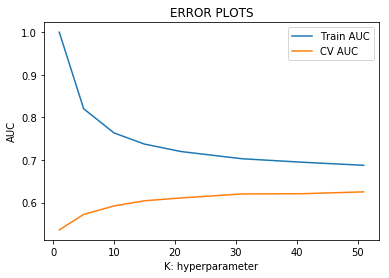

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X1_train, y_train)
    
    X1_train_csr=X1_train.tocsr()
    X1_cv_csr=X1_cv.tocsr()
    y_train_pred =  batch_predict_proba(neigh, X1_train_csr)
    y_cv_pred =  batch_predict_proba(neigh, X1_cv_csr)

    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

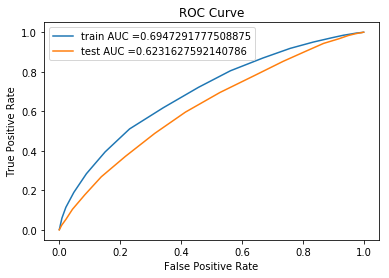

the maximum value of tpr*(1-fpr) 0.4069294681725383 for threshold 0.78
Train confusion matrix
[[   21  3556]
 [   21 18847]]
Test confusion matrix
[[    8  2651]
 [    8 13833]]


In [80]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=41)
neigh.fit(X1_train, y_train)
X1_test_csr=X1_test.tocsr()


y_train_pred = batch_predict(neigh, X1_train_csr)    
y_test_pred = batch_predict(neigh, X1_test_csr)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, batch_predict_proba(neigh, X1_train_csr))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, batch_predict_proba(neigh, X1_test_csr))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

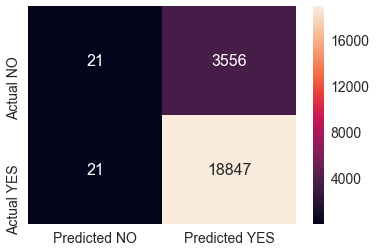

In [81]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted NO','Predicted YES']    
df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

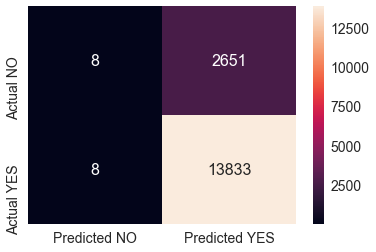

In [82]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted NO','Predicted YES']    
df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})    
sns.set(font_scale=1.4)  
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

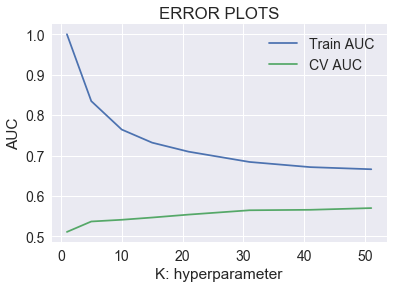

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X2_train, y_train)
    
    X2_train_csr=X2_train.tocsr()
    X2_cv_csr=X2_cv.tocsr()
    y_train_pred =  batch_predict_proba(neigh, X2_train_csr)
    y_cv_pred =  batch_predict_proba(neigh, X2_cv_csr)

    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

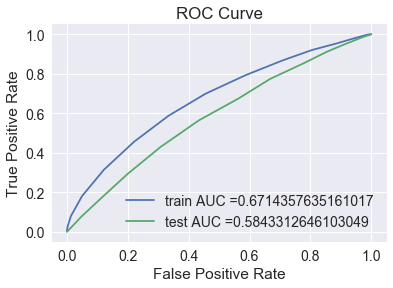

the maximum value of tpr*(1-fpr) 0.3914176437227715 for threshold 0.854
Train confusion matrix
[[    1  3576]
 [    0 18868]]
Test confusion matrix
[[    0  2659]
 [    1 13840]]


In [84]:
from sklearn.metrics import roc_curve, auc

neigh = KNeighborsClassifier(n_neighbors=41)
neigh.fit(X2_train, y_train)
X2_test_csr=X2_test.tocsr()


y_train_pred = batch_predict(neigh, X2_train_csr)    
y_test_pred = batch_predict(neigh, X2_test_csr)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, batch_predict_proba(neigh, X2_train_csr))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, batch_predict_proba(neigh, X2_test_csr))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


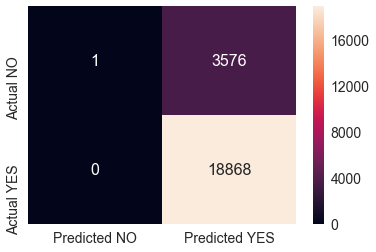

In [85]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted NO','Predicted YES']    
df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

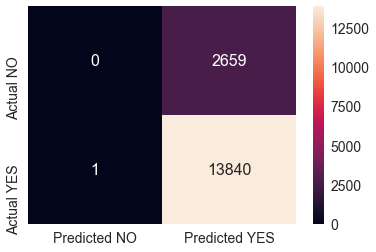

In [86]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted NO','Predicted YES']    
df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

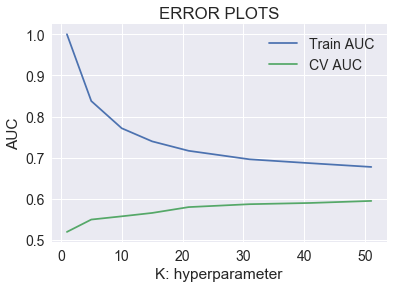

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X3_train, y_train)
    
    X3_train_csr=X3_train.tocsr()
    X3_cv_csr=X3_cv.tocsr()
    y_train_pred =  batch_predict_proba(neigh, X3_train_csr)
    y_cv_pred =  batch_predict_proba(neigh, X3_cv_csr)

    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

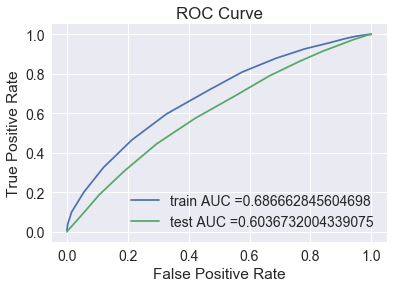

the maximum value of tpr*(1-fpr) 0.40151788903607594 for threshold 0.854
Train confusion matrix
[[    0  3577]
 [    0 18868]]
Test confusion matrix
[[    0  2659]
 [    0 13841]]


In [88]:
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=41)
neigh.fit(X3_train, y_train)
X3_test_csr=X3_test.tocsr()


y_train_pred = batch_predict(neigh, X3_train_csr)    
y_test_pred = batch_predict(neigh, X3_test_csr)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, batch_predict_proba(neigh, X3_train_csr))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, batch_predict_proba(neigh, X3_test_csr))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

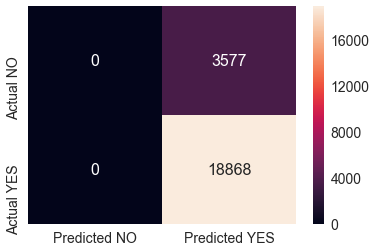

In [89]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted NO','Predicted YES']    
df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})    
sns.set(font_scale=1.4)    
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

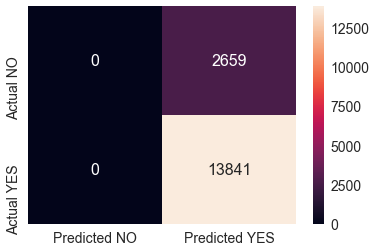

In [90]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted NO','Predicted YES']    
df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})    
sns.set(font_scale=1.4)    
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

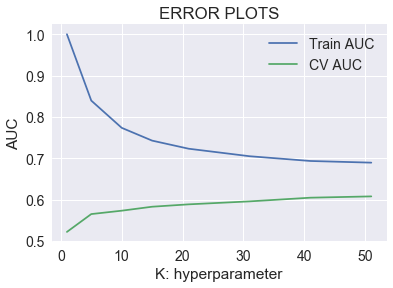

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X4_train, y_train)
    
    X4_train_csr=X4_train.tocsr()
    X4_cv_csr=X4_cv.tocsr()
    y_train_pred =  batch_predict_proba(neigh, X4_train_csr)
    y_cv_pred =  batch_predict_proba(neigh, X4_cv_csr)

    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

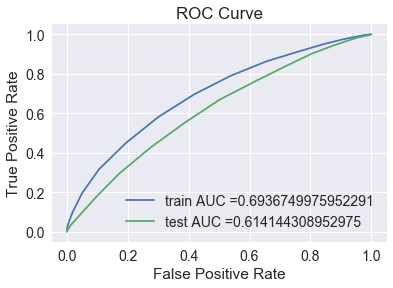

the maximum value of tpr*(1-fpr) 0.4067419167840801 for threshold 0.854
Train confusion matrix
[[    0  3577]
 [    0 18868]]
Test confusion matrix
[[    0  2659]
 [    1 13840]]


In [92]:
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=41)
neigh.fit(X4_train, y_train)

X4_train_csr=X4_train.tocsr()
X4_test_csr=X4_test.tocsr()


y_train_pred = batch_predict(neigh, X4_train_csr)    
y_test_pred = batch_predict(neigh, X4_test_csr)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, batch_predict_proba(neigh, X4_train_csr))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, batch_predict_proba(neigh, X4_test_csr))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

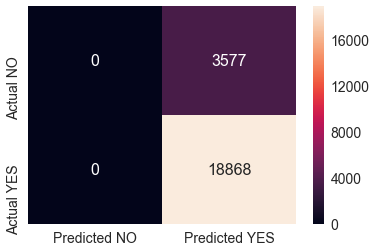

In [93]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted NO','Predicted YES']    
df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})    
sns.set(font_scale=1.4)    
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

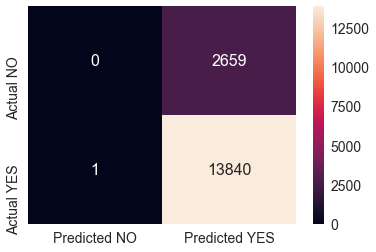

In [94]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted NO','Predicted YES']    
df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [95]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_classif

model=SelectKBest(f_classif, k=2000)
model.fit(X2_train, y_train)
X2_train_new = model.transform(X2_train)
X2_cv_new = model.transform(X2_cv)
X2_test_new = model.transform(X2_test)

print(X2_train_new.shape)
print(X2_cv_new.shape)
print(X2_test_new.shape)

(22445, 2000)
(11055, 2000)
(16500, 2000)


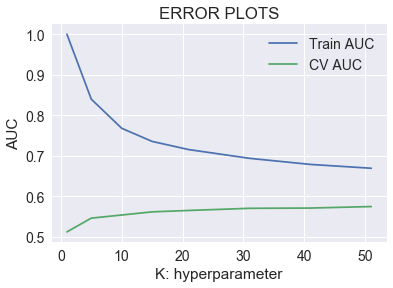

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X2_train_new, y_train)
    
    X2_train_new_csr=X2_train_new.tocsr()
    X2_cv_new_csr=X2_cv_new.tocsr()
    y_train_pred =  batch_predict_proba(neigh, X2_train_new_csr)
    y_cv_pred =  batch_predict_proba(neigh, X2_cv_new_csr)

    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

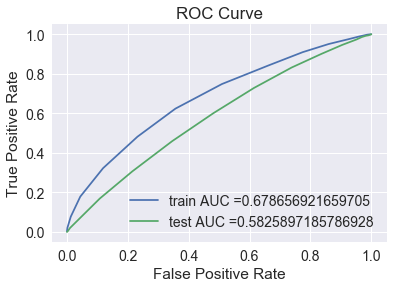

the maximum value of tpr*(1-fpr) 0.4013527703227739 for threshold 0.854
Train confusion matrix
[[    0  3577]
 [    0 18868]]
Test confusion matrix
[[    0  2659]
 [    0 13841]]


In [98]:
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=41)
neigh.fit(X2_train_new, y_train)

X2_train_new_csr=X2_train_new.tocsr()
X2_test_new_csr=X2_test_new.tocsr()

y_train_pred = batch_predict(neigh, X2_train_new_csr)    
y_test_pred = batch_predict(neigh, X2_test_new_csr)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, batch_predict_proba(neigh, X2_train_new_csr))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, batch_predict_proba(neigh, X2_test_new_csr))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

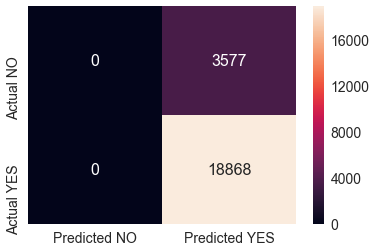

In [99]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))  
df_cm.columns = ['Predicted NO','Predicted YES']    
df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

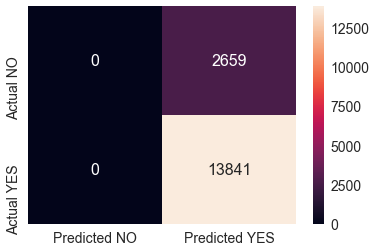

In [100]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))  
df_cm.columns = ['Predicted NO','Predicted YES']    
df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})    
sns.set(font_scale=1.4)   
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusions</h1>

In [102]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "HyperParameter", "AUC"]

x.add_row(["BOW", "Brute Force", 41,0.69 ])
x.add_row(["TFIDF", "Brute Force", 41,0.67 ])
x.add_row(["AVG W2V", "Brute Force", 41,0.68 ])
x.add_row(["TFIDF W2V", "Brute Force", 41,0.69 ])

print(x)

+------------+-------------+----------------+------+
| Vectorizer |    Model    | HyperParameter | AUC  |
+------------+-------------+----------------+------+
|    BOW     | Brute Force |       41       | 0.69 |
|   TFIDF    | Brute Force |       41       | 0.67 |
|  AVG W2V   | Brute Force |       41       | 0.68 |
| TFIDF W2V  | Brute Force |       41       | 0.69 |
+------------+-------------+----------------+------+
